# Parser for MINCUT-MAXFLOW algorithm
This script does the following;
1. extracts the required data, 
2. builds a graph network using networkx, 
3. executes MINCUT-MAXFLOW algorithm,  
4. and exports a CSV with the results.

#### 1. Load data into dictionary from .csv with the following __schedule__;

edge_id,source_name,sink_name,source_lat,source_lon,sink_lat,sink_lon,record_count,scheduled,abs_median_deviation,relative_deviation_factor,flow

In [9]:
import csv
import os

# establish dictionaries
edges = {}

# Load data about each edge in Uppsala Network (UL)
with open('./data/ul_edge_flows.csv') as file:
    reader1 = csv.DictReader(file)
    # Create dictionary key for each row in the csv with values on name, latitude and longitude
    for row in reader1:
        edges[row['edge_id']] = row

#### 2. Build a directed and weighted graph from the data

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# Build graph from dictionary of edges
H = nx.DiGraph()
for i,edge in enumerate(edges.values()):
    #print(edge['source_id'], edge['sink_id'], round(float(edge['index']),2))
        H.add_edge(int(edge['source_id']),int(edge['sink_id']),a=float(edge['flow']))

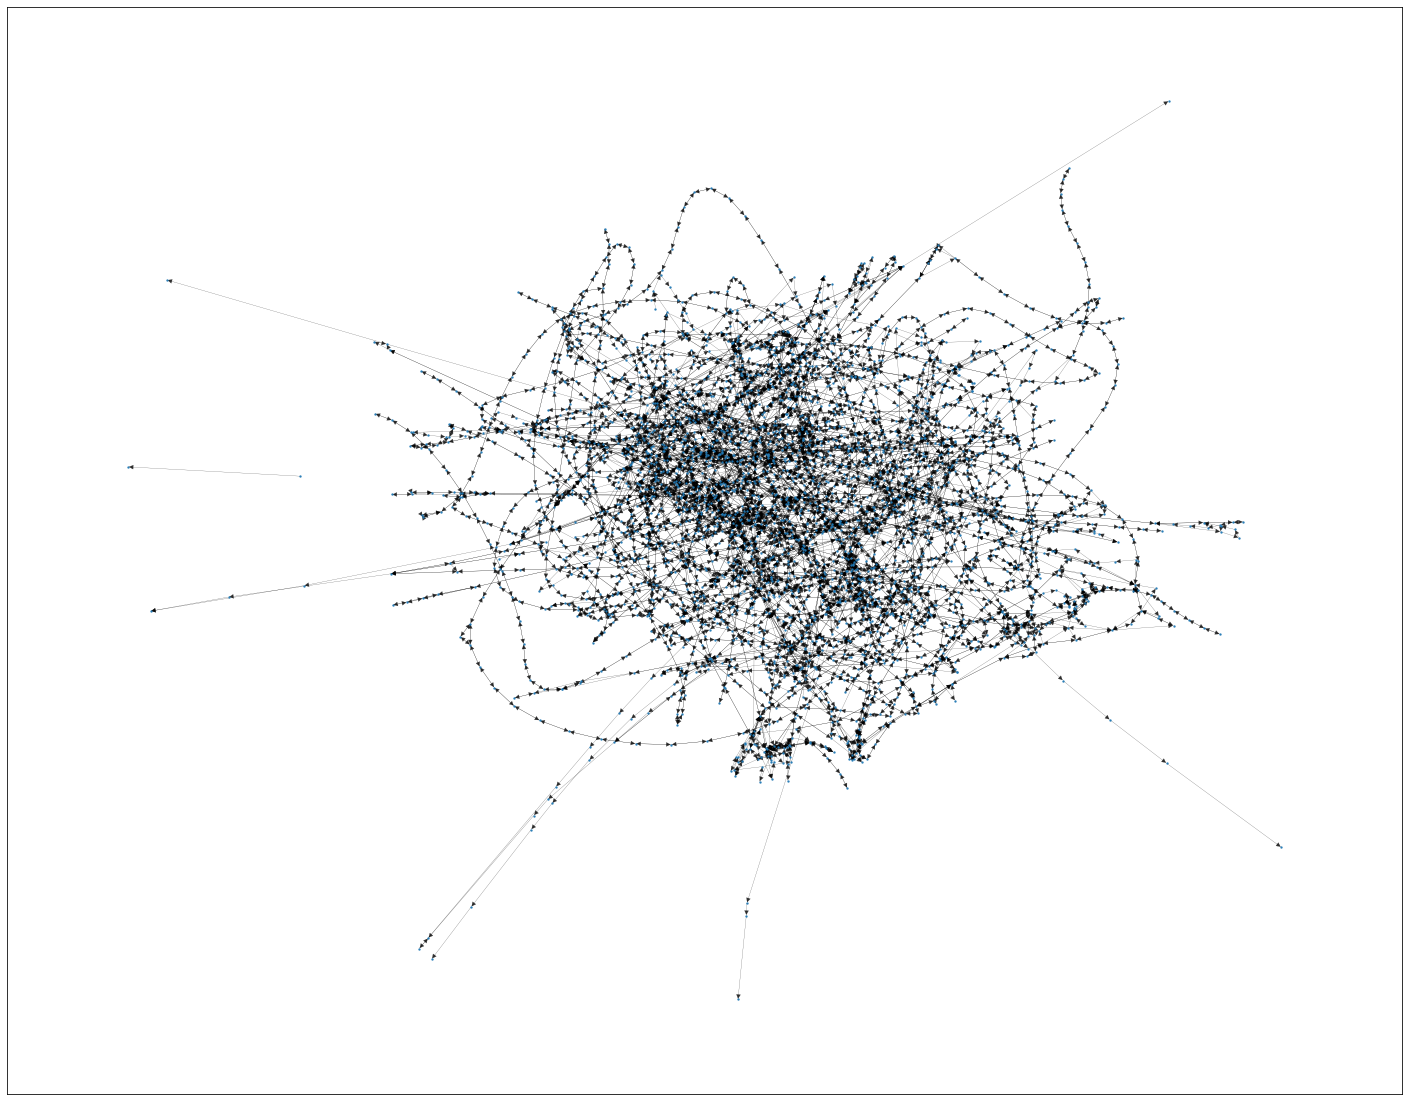

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20));
nx.draw_networkx(H, ax=ax, with_labels=False,node_size=2,alpha=0.8,width=0.2)

#### 2. Establish methods for algorithms

MINCUT-MAXFLOW: The function __minimum_cut()__ returns cut_value that is the total weight of all cutting edges, as well as 2 sets of nodes each of them is a partition that contains the "s" or the "t" from which you can easily compute the edge_cut.

In [30]:
import numpy as np
import pandas as pd

def hasPath(s,t):
    return nx.has_path(H,s,t)

def shortestPath(s,t):
    return nx.shortest_path(H,s,t,weight='a')

# Retu
def mincut(s,t):
    cut_value, [reachable, non_reachable] = nx.minimum_cut(H,s,t, capacity='a')
    return [cut_value, len(reachable), len(non_reachable)]

def cardinality(s,t):
    return nx.minimum_node_cut(H,s,t)

def mincutToAllNodes(source_node_id):
    vals = []
    vals.append()
    
    
    source_id=stops[str(source_node_id)]['stop_id']
    source_name=stops[str(source_node_id)]['stop_name']
    source_lon=stops[str(source_node_id)]['stop_lon']
    source_lat=stops[str(source_node_id)]['stop_lat']
    for node in H.nodes():
        if node != source_node:
            sink_id=stops[str(node)]['stop_id']
            sink_name=stops[str(node)]['stop_name']
            sink_lon=stops[str(node)]['stop_lon']
            sink_lat=stops[str(node)]['stop_lat']
            
            print(round(mincut(source_node_id,node)[0],4),"\t",mincut(source_node_id,node)[1],"\t",mincut(source_node_id,node)[2],"\t",source_id,source_name,sink_id,sink_name)
            vals.append((mincut(source_node_id,node)[0],mincut(source_node_id,node)[1],mincut(source_node_id,node)[2],source_id,source_name,source_lon,source_lat,sink_id,sink_name,sink_lon,sink_lat))

    output = np.array(vals, dtype=str)
    pd.DataFrame(output).to_csv("./mincut_values_from_" + source_id +".csv",index=False,header=['cut_value','reachable','non_reachable','source_id','source_name','source_lon','source_lat','sink_id','sink_name','sink_lon','sink_lat'])


In [40]:
nx.maximum_flow(H,9022003700600,9022003791305,capacity='a')

(42.07595454545455,
 {9022003799482: {9022003780148: 0},
  9022003780148: {9022003780147: 0,
   9022003780146: 0,
   9022003779570: 0.7194818181818183,
   9022003779476: 0,
   9022003779464: 0},
  9022003799481: {9022003780851: 0, 9022003780367: 0.60605},
  9022003780851: {9022003799481: 0.60605,
   9022003780904: 0.07661818181818181,
   9022003779488: 0},
  9022003780367: {9022003780857: 1.2838818181818175,
   9022003780371: 30.181100000000065,
   9022003780362: 0},
  9022003799480: {9022003780599: 0.6084454545454546},
  9022003780599: {9022003780622: 17.652809090909084, 9022003700244: 0},
  9022003799010: {9022003780444: 0.47947727272727275, 9022003780134: 0},
  9022003780444: {9022003780929: 0,
   9022003780869: 0,
   9022003780850: 0.37763636363636355,
   9022003780443: 0,
   9022003780441: 9.316509090909097,
   9022003779597: 0},
  9022003780134: {9022003799010: 0.3841272727272816,
   9022003780444: 0.3393818181818182,
   9022003780420: 0},
  9022003799009: {9022003780578: 0},
  9

#### Computing the average degree connectivity of the graph.

The average degree connectivity is the average nearest neighbor degree of nodes with degree k. For weighted graphs, an analogous measure can be computed using the weighted average neighbors degree.

In [49]:
nx.k_nearest_neighbors(H,'in+out','in+out',weight='a')

{2: 2.4672023137530177,
 9: 3.224797061013991,
 4: 2.690590334544085,
 5: 3.307009610920636,
 7: 3.474515012799073,
 13: 4.114950728276256,
 6: 3.8492849489603422,
 8: 3.8925991453181568,
 14: 7.229046794091129,
 10: 3.627162312958644,
 37: 3.0959056499210496,
 12: 5.53815962949278,
 15: 4.256128187725079,
 3: 2.2447156583597403,
 11: 4.22422563283959,
 22: 5.015754654621449,
 1: 2.8887861144525186,
 19: 3.7301644626725565,
 28: 3.158386124247803,
 20: 3.3674846702805685,
 17: 3.040184422923833,
 18: 4.004449276219838,
 16: 3.360466264596977}

#### Compute load centrality for nodes.

The load centrality of a node is the *fraction of all shortest paths* that pass through that node.

In [69]:
load_centrality = nx.load_centrality(H,weight='a')
betweenness_centrality = nx.betweenness_centrality(H,weight='a')